In [31]:
# import the necessary packages
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
#from config import dogs_vs_cats_config as config
from CV.preprocessing.ImageToArrayPreprocessor import ImageToArrayPreprocessor
from CV.preprocessing.SimplePreprocessor import SimplePreprocessor
from CV.preprocessing.patchpreprocessor import PatchPreprocessor
from CV.preprocessing.meanpreprocessor import MeanPreprocessor
#from CV.callbacks import TrainingMonitor
from CV.io.hdf5datasetgenerator import HDF5DatasetGenerator
from CV.nn.conv.alexnet import AlexNet
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import json
import os
from imutils import paths
from CV.datasets.SimpleDatasetLoader import SimpleDatasetLoader

print("[info] loading images...")

imagePaths = list(paths.list_images("C:/Users/HOU/Documents/practical_bundle/data3/"))

sp = SimplePreprocessor(227,227 )
iap = ImageToArrayPreprocessor()
#mp = MeanPreprocessor(means["R"], means["G"], means["B"])

sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)

[info] loading images...
[INFO] processed 500/5832
[INFO] processed 1000/5832
[INFO] processed 1500/5832
[INFO] processed 2000/5832
[INFO] processed 2500/5832
[INFO] processed 3000/5832
[INFO] processed 3500/5832
[INFO] processed 4000/5832
[INFO] processed 4500/5832
[INFO] processed 5000/5832
[INFO] processed 5500/5832


In [32]:
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
data = data-255.0
data = data.astype("float") / 50
#if K.image_data_format() == "channels_first":
#    data = data.reshape(data.shape[0],1,28,28)
#else:
#    data = data.reshape(data.shape[0], 28, 28, 1)
    

(train_X, test_X, train_y, test_y) = train_test_split(data,
                               labels, test_size=0.25,
                                                     random_state=42)


from keras.utils import to_categorical
lb = LabelBinarizer()
#train_y = lb.fit_transform(train_y)
#test_y = lb.fit_transform(test_y)
lb.fit(train_y)
train_y=lb.transform(train_y)
test_y = lb.transform(test_y)
train_y = to_categorical(train_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)

In [33]:
from keras.optimizers import Adam
EPOCHS = 30
INIT_LR = 1e-3
BS = 128
# initialize the optimizer and model
print("[INFO] compiling model...")
#opt = SGD(lr=0.01, decay=0.01/40, momentum=0.9,nesterov=True)
#opt = Adam(lr=0.05, decay=0.05 / 40)
#opt = SGD(lr=0.1)
#opt = SGD(lr=0.05, decay=0.05/20, momentum=0.9,nesterov=True)
opt = Adam(lr=1e-3)
model = AlexNet.build(width=227, height=227, depth=3, classes=2)
model.compile(loss="binary_crossentropy", optimizer=opt,
metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(train_X, train_y, validation_data=(test_X, test_y),
    batch_size=BS, epochs=EPOCHS, verbose=1)



[INFO] compiling model...
[INFO] training network...
Train on 4374 samples, validate on 1458 samples
Epoch 1/30
4374/4374 [==============================] - 508s 116ms/step - loss: 5.3678 - acc: 0.5428 - val_loss: 5.6243 - val_acc: 0.5741
Epoch 2/30
4374/4374 [==============================] - 483s 110ms/step - loss: 3.4352 - acc: 0.6116 - val_loss: 3.5439 - val_acc: 0.6406
Epoch 3/30
4374/4374 [==============================] - 490s 112ms/step - loss: 3.1018 - acc: 0.6959 - val_loss: 3.2530 - val_acc: 0.6399
Epoch 4/30
4374/4374 [==============================] - 493s 113ms/step - loss: 2.9018 - acc: 0.7689 - val_loss: 3.3685 - val_acc: 0.6049
Epoch 5/30
4374/4374 [==============================] - 494s 113ms/step - loss: 2.7058 - acc: 0.8198 - val_loss: 3.5782 - val_acc: 0.6070
Epoch 6/30
4374/4374 [==============================] - 489s 112ms/step - loss: 2.5919 - acc: 0.8326 - val_loss: 4.2243 - val_acc: 0.5494
Epoch 7/30
4374/4374 [==============================] - 491s 112ms/step

NameError: name 'plt' is not defined

In [95]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(test_X, batch_size=BS)
print(test_y.argmax(axis=1))
print(predictions.argmax(axis=1))
#print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1),
#      target_names=[str(x) for x in lb.classes_]))

print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))


[INFO] evaluating network...
[0 0 0 ... 1 1 1]
[0 0 0 ... 0 1 1]
                                                 precision    recall  f1-score   support

C:/Users/HOU/Documents/practical_bundle/data3/0       0.89      1.00      0.94       711
C:/Users/HOU/Documents/practical_bundle/data3/1       1.00      0.88      0.94       747

                                    avg / total       0.94      0.94      0.94      1458



In [103]:
print(test_y[:100].argmax(axis=1))
print(predictions[:100].argmax(axis=1))

[0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1]
[0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1]


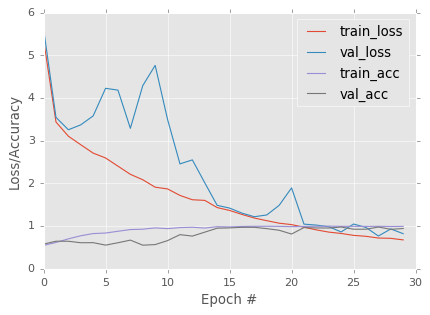

In [78]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=[6,4])
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_acc"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


In [45]:
print (plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


Text(0.5,1,'Loss Curves')

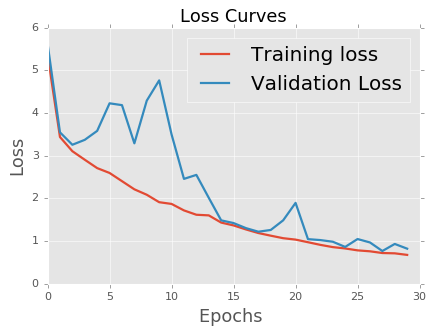

In [85]:
# Loss Curves
plt.figure(figsize=[6,4])
plt.style.use('ggplot')
plt.plot(H.history['loss'],linewidth=2.0)
plt.plot(H.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

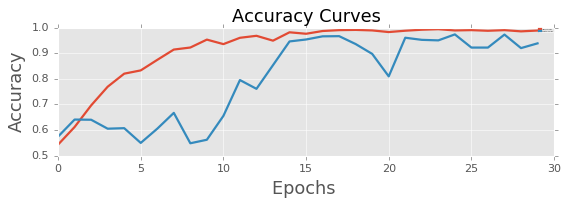

In [91]:
# Accuracy Curves
plt.figure(figsize=[8,2])
plt.plot(H.history['acc'],linewidth=2.0)
plt.plot(H.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=1)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [111]:
timagePaths = list(paths.list_images("C:/Users/HOU/Documents/datasets/output1/"))

sp = SimplePreprocessor(227,227 )
iap = ImageToArrayPreprocessor()
#mp = MeanPreprocessor(means["R"], means["G"], means["B"])

tsdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(tdata, tlabels) = tsdl.load(timagePaths, verbose=500)

tdata = tdata-255.0
tdata = tdata.astype("float") / 50
#if K.image_data_format() == "channels_first":
#    data = data.reshape(data.shape[0],1,28,28)
#else:
#    data = data.reshape(data.shape[0], 28, 28, 1)
    

(ttrain_X, ttest_X, ttrain_y, ttest_y) = train_test_split(tdata,
                               tlabels, test_size=.9,
                                                     random_state=42)


ttrain_y


[INFO] processed 500/1521
[INFO] processed 1000/1521
[INFO] processed 1500/1521


array(['C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/0',
       'C:/Users/HOU/Documents/datasets/output1/0',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/0',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/0',
       'C:/Users/HOU/Documents/datasets/output1/0',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/0',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/Users/HOU/Documents/datasets/output1/1',
       'C:/U

In [112]:
lb = LabelBinarizer()
lb.fit(ttrain_y)
ttrain_y=lb.transform(ttrain_y)
ttest_y = lb.transform(ttest_y)
ttrain_y = to_categorical(ttrain_y, num_classes=2)
ttest_y = to_categorical(ttest_y, num_classes=2)

# evaluate the network
print("[INFO] evaluating network...")
tpredictions = model.predict(ttest_X, batch_size=BS)
print(ttest_y.argmax(axis=1))
print(tpredictions.argmax(axis=1))
#print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1),
#      target_names=[str(x) for x in lb.classes_]))

print(classification_report(ttest_y.argmax(axis=1),tpredictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
[0 1 1 ... 0 1 1]
[1 0 1 ... 1 0 0]
                                           precision    recall  f1-score   support

C:/Users/HOU/Documents/datasets/output1/0       0.42      0.29      0.34       670
C:/Users/HOU/Documents/datasets/output1/1       0.48      0.63      0.54       699

                              avg / total       0.45      0.46      0.44      1369

